In [1]:
%load_ext autoreload
%load_ext tensorboard
%matplotlib inline

In [2]:
import matplotlib
import numpy as np
import os
import random
import yaml
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib import cm
import seaborn as sns
from importlib import reload
from pathlib import Path
import sklearn
import joblib
import torch
import pandas as pd
import copy

# Set the font to a nicer font
rc('text', usetex=False)
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "serif"

# CUB Visualization

In [5]:
CUB_DIR = "/homes/me466/data/CUB200/"
CUB_IMAGE_DIR = os.path.join(CUB_DIR, "CUB_200_2011/images/")
CUB_IMAGE_PATH_FILE = os.path.join(CUB_DIR, "CUB_200_2011/images.txt")

with open(CUB_IMAGE_PATH_FILE, 'r') as f:
    cub_image_paths = [x.rstrip().split(" ")[-1] for x in f]
print("Found a total of", len(cub_image_paths), "CUB images")

Found a total of 11788 CUB images


Using images [10476]
Working with 1 images!


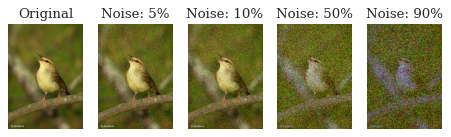

Using images [631]
Working with 1 images!


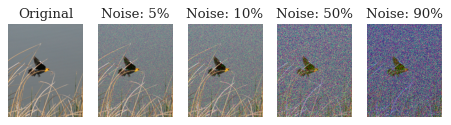

Using images [6693]
Working with 1 images!


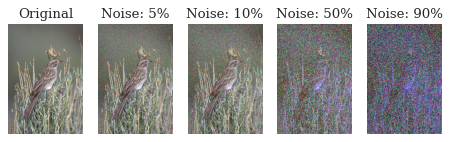

Using images [4454]
Working with 1 images!


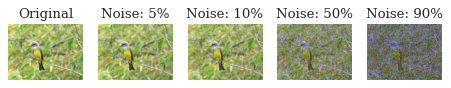

Using images [1251]
Working with 1 images!


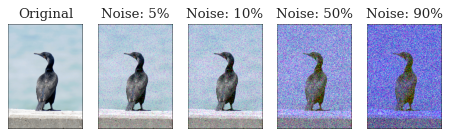

In [9]:
# Load CUB Images onto memory to speed things up
from PIL import Image
import random
from cem.data.utils import transform_from_config

number_of_times = 5
num_samples = 1
noise_levels = [0, 0.05, 0.1, 0.5, 0.9]

for i in range(number_of_times):
    random.seed(42 + i)
    np.random.seed(42 + i)

    used_indices = random.sample(range(len(cub_image_paths)), num_samples)
    print("Using images", used_indices)
    cub_images = [
        Image.open(os.path.join(CUB_DIR, f"CUB_200_2011/images/{cub_image_paths[x]}"))
        for x in used_indices
    ]
    print(f"Working with {len(cub_images)} images!")
    fig, axs = plt.subplots(
        num_samples,
        len(noise_levels),
        figsize=(7*num_samples, 7*len(noise_levels)),
        dpi=80,
        squeeze=False,
    )

    for row, img in enumerate(cub_images):
        for col, noise_level in enumerate(noise_levels):
            test_transform_config = dict(
                name='salt_and_pepper',
                amount=noise_level,
                s_vs_p=0.5,
            )
            ax = axs[row, col]
            transform = transform_from_config(test_transform_config)
            ax.imshow(transform(torch.tensor(np.array(img))))
            if row == 0:
                if noise_level:
                    ax.set_title(f'Noise: {int(noise_level*100)}%')
                else:
                    ax.set_title(f'Original')
            ax.axis("off")
            ax.axis(False)
    plt.savefig(f"../figures/noised_cub_examples_{i}.pdf", bbox_inches='tight')
    plt.savefig(f"../figures/noised_cub_examples_{i}.png", bbox_inches='tight')
    plt.show()

Using images [10476, 1824, 409]
Working with 3 images!


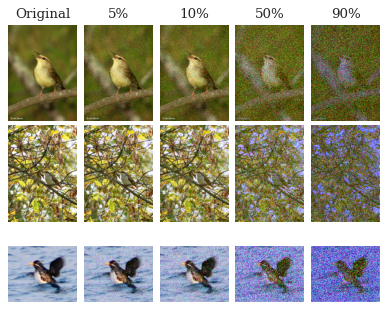

Using images [631, 4687, 11406]
Working with 3 images!


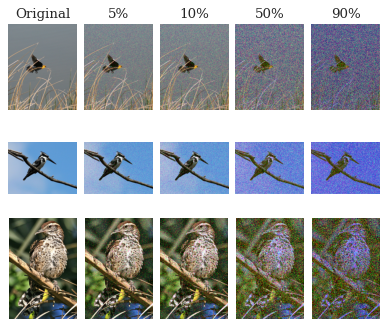

Using images [6693, 8520, 8879]
Working with 3 images!


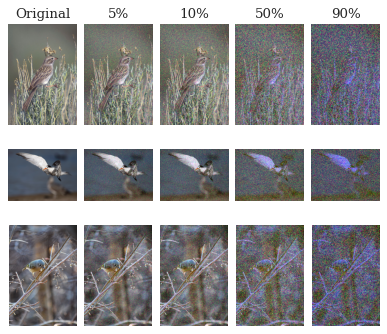

In [18]:
# Load CUB Images onto memory to speed things up
from PIL import Image
import random
from cem.data.utils import transform_from_config

number_of_times = 3
num_samples = 3
noise_levels = [0, 0.05, 0.1, 0.5, 0.9]

for i in range(number_of_times):
    random.seed(42 + i)
    np.random.seed(42 + i)

    used_indices = random.sample(range(len(cub_image_paths)), num_samples)
    print("Using images", used_indices)
    cub_images = [
        Image.open(os.path.join(CUB_DIR, f"CUB_200_2011/images/{cub_image_paths[x]}"))
        for x in used_indices
    ]
    print(f"Working with {len(cub_images)} images!")
    fig, axs = plt.subplots(
        num_samples,
        len(noise_levels),
        figsize=(2*num_samples, len(noise_levels)),
        dpi=80,
        squeeze=False,
    )

    for row, img in enumerate(cub_images):
        for col, noise_level in enumerate(noise_levels):
            test_transform_config = dict(
                name='salt_and_pepper',
                amount=noise_level,
                s_vs_p=0.5,
            )
            ax = axs[row, col]
            transform = transform_from_config(test_transform_config)
            ax.imshow(transform(torch.tensor(np.array(img))))
            if row == 0:
                if noise_level:
                    ax.set_title(f'{int(noise_level*100)}%')
                else:
                    ax.set_title(f'Original')
            ax.axis("off")
            ax.axis(False)
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.savefig(f"../figures/noised_grid_cub_examples_{i}.pdf", bbox_inches='tight')
    plt.savefig(f"../figures/noised_grid_cub_examples_{i}.png", bbox_inches='tight')
    plt.show()

# TravelBirds Visualization

In [12]:
CUB_DIR = "/homes/me466/data/CUB200/"
TRAVELBIRDS_DIR = "/anfs/bigdisc/me466/TravelingBirds/"
CUB_IMAGE_DIR = os.path.join(CUB_DIR, "CUB_200_2011/images/")
CUB_IMAGE_PATH_FILE = os.path.join(CUB_DIR, "CUB_200_2011/images.txt")

with open(CUB_IMAGE_PATH_FILE, 'r') as f:
    cub_image_paths = [x.rstrip().split(" ")[-1] for x in f]
print("Found a total of", len(cub_image_paths), "CUB images")

Found a total of 11788 CUB images


Using images [10476, 1824, 409, 4506, 4012]
Working with 5 images!
Using images [631, 4687, 11406, 2358, 7578]
Working with 5 images!


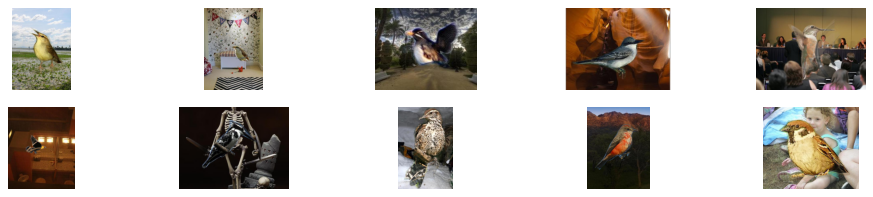

In [16]:
from PIL import Image
import random
from cem.data.utils import transform_from_config

number_of_times = 1
num_samples = 5
fig, axs = plt.subplots(
    2,
    num_samples,
    figsize=(3*num_samples, 3),
    dpi=80,
    squeeze=False,
)
for row in range(2):
    random.seed(42 + row)
    np.random.seed(42 + row)

    used_indices = random.sample(range(len(cub_image_paths)), num_samples)
    print("Using images", used_indices)
    travelbird_images = [
        Image.open(os.path.join(CUB_DIR, f"{TRAVELBIRDS_DIR}/{'train' if row == 0 else 'test'}/{cub_image_paths[x]}"))
        for x in used_indices
    ]
    print(f"Working with {len(travelbird_images)} images!")
    for col, img in enumerate(travelbird_images):
        ax = axs[row, col]
        ax.imshow(torch.tensor(np.array(img)))
        # if row == 0:
        #     if noise_level:
        #         ax.set_title(f'Noise: {int(noise_level*100)}%')
        #     else:
        #         ax.set_title(f'Original')
        ax.axis("off")
        ax.axis(False)
plt.savefig(f"../figures/travelbirds_examples.pdf", bbox_inches='tight')
plt.savefig(f"../figures/travelbirds_examples.png", bbox_inches='tight')
plt.show()